This dataset contains information about various bookings of two hotels: Resort Hotel and City Hotel.
We are going to perform some Exploratory Data Analysis (EDA) on this data and we will see if we can come out with some
valuable insights.

The dataset was provided by kaggle:
https://www.kaggle.com/jessemostipak/hotel-booking-demand

Let's start exploring our data!!!!

# Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from datetime import datetime

In [2]:
# Importing the dataset

data = pd.read_csv("hotel_bookings.csv")
df = pd.DataFrame(data)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# Identifying the features in the dataset

print(len(df.columns))
df.columns

32


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.shape

(119390, 32)

Now, we will do some data preprocessing before we can start EDA

In [6]:
df.iloc[:,[3,4,6]].head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month
0,2015,July,1
1,2015,July,1
2,2015,July,1
3,2015,July,1
4,2015,July,1


In [7]:
# Mapping the Months with their number

df['arrival_date_month'] = df['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
                                                        'July':7, 'August':8, 'September':9, 'October':10, 'November':11,
                                                        'December':12})

In [8]:
df.iloc[:,[3,4,6]].head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month
0,2015,7,1
1,2015,7,1
2,2015,7,1
3,2015,7,1
4,2015,7,1


In [9]:
# Creating a Date feature 

date_of_arrival = []

for x in range(0,len(df)):
    x = datetime(df.iloc[x,3], df.iloc[x,4], df.iloc[x,6])
    date_of_arrival.append(x)
date_of_arrival_df = pd.DataFrame(date_of_arrival)
date_of_arrival_df.head()

,0
0,2015-07-01
1,2015-07-01
2,2015-07-01
3,2015-07-01
4,2015-07-01


In [10]:
# Concatenating the Date feature in our dataframe and dropping the individual day, month, and year features

df.drop(['arrival_date_year','arrival_date_month','arrival_date_day_of_month'],axis = 1,inplace = True)
df_1 = pd.concat([date_of_arrival_df,df ], axis = 1)
df_1.rename(columns = {0:'Arrival_Date'}, inplace = True)
df_1.head()

,Arrival_Date,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,2015-07-01,Resort Hotel,0,342,27,0,0,2,0.0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,2015-07-01,Resort Hotel,0,737,27,0,0,2,0.0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2015-07-01,Resort Hotel,0,7,27,0,1,1,0.0,0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,2015-07-01,Resort Hotel,0,13,27,0,1,1,0.0,0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,2015-07-01,Resort Hotel,0,14,27,0,2,2,0.0,0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
# Counting the number of individuals per booking 
# Creating a new feature "Total_individuals" in our dataframe

df_1['Total_individuals'] = df_1['adults'] + df_1['children'] + df_1['babies']
df_1.head()

,Arrival_Date,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_individuals
0,2015-07-01,Resort Hotel,0,342,27,0,0,2,0.0,0,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
1,2015-07-01,Resort Hotel,0,737,27,0,0,2,0.0,0,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,2015-07-01,Resort Hotel,0,7,27,0,1,1,0.0,0,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,2015-07-01,Resort Hotel,0,13,27,0,1,1,0.0,0,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,2015-07-01,Resort Hotel,0,14,27,0,2,2,0.0,0,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


In [12]:
df_1.columns

Index(['Arrival_Date', 'hotel', 'is_canceled', 'lead_time',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Total_individuals'],
      dtype='object')

Let's try to find out the pattern of bookings throughout the year

In [13]:
df_count_of_bookings = df_1.iloc[:,[0,7,8,9,30]]
df_count_of_bookings.head()

,Arrival_Date,adults,children,babies,Total_individuals
0,2015-07-01,2,0.0,0,2.0
1,2015-07-01,2,0.0,0,2.0
2,2015-07-01,1,0.0,0,1.0
3,2015-07-01,1,0.0,0,1.0
4,2015-07-01,2,0.0,0,2.0


In [14]:
idx = pd.to_datetime(df_count_of_bookings['Arrival_Date'])
df_count_of_bookings.set_index(idx, inplace = True)
df_count_of_bookings.drop('Arrival_Date',axis = 1, inplace = True )
df_count_of_bookings.head()

C:\Users\arun\anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,adults,children,babies,Total_individuals
Arrival_Date,,,,
2015-07-01,2,0.0,0,2.0
2015-07-01,2,0.0,0,2.0
2015-07-01,1,0.0,0,1.0
2015-07-01,1,0.0,0,1.0
2015-07-01,2,0.0,0,2.0


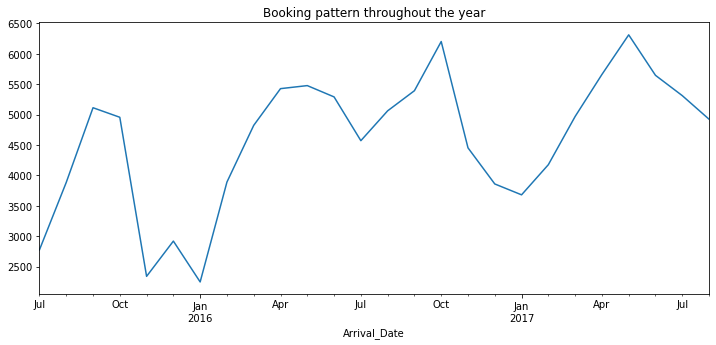

In [15]:
df_time_series = df_count_of_bookings.iloc[:,3]
df_time_series.resample(rule = 'M').count().plot(figsize = (12,5))
plt.title('Booking pattern throughout the year')
plt.show()

From the above plot, it is clear that there seems to be some seasonality in number of bookings throughout the year.
We can also see some increasing trend.

Let's visualize the trend and seasonality

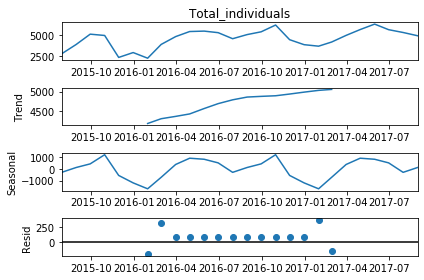

In [16]:
# ETS decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_time_series.resample(rule = 'M').count(), model='add')  # model='mul' also works
result.plot();

By visualizing the ETS decomposition plots, it clear that increasing trend and seasonality exists.

Now, let's find out which of the months have the highest count of bookings

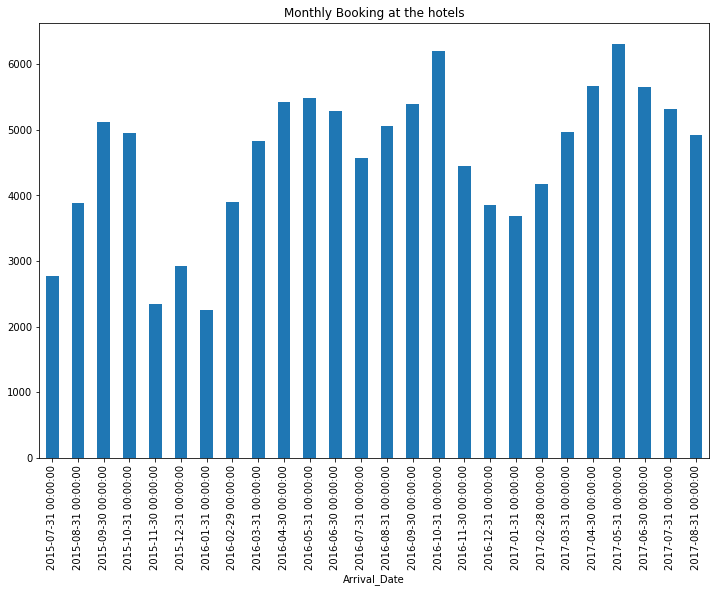

In [17]:
title = "Monthly Booking at the hotels"
df_time_series.resample(rule = 'M').count().plot.bar(title = title, figsize = (12,8))



From the above bar plot, we can infer that months August and September are most busy months for the hotels.

# Resort Hotel vs City Hotel

In [18]:
resort_vs_city = df_1.iloc[:,[1,2,3,7,8,9,30]]
resort_vs_city.head()

,hotel,is_canceled,lead_time,adults,children,babies,Total_individuals
0,Resort Hotel,0,342,2,0.0,0,2.0
1,Resort Hotel,0,737,2,0.0,0,2.0
2,Resort Hotel,0,7,1,0.0,0,1.0
3,Resort Hotel,0,13,1,0.0,0,1.0
4,Resort Hotel,0,14,2,0.0,0,2.0


In [19]:
#Total number of cancelled bookings

(resort_vs_city['is_canceled'] != 0).sum()

44224

In [20]:
# Counting the number of cancellations and bookings in "Resort Hotel" and "City Hotel" seperately

resort_hotel = resort_vs_city[resort_vs_city['hotel'] == 'Resort Hotel']
resort_hotel_cancelled = (resort_hotel['is_canceled'] != 0).sum()
print("Number of Resort Hotel cancellation: {}".format(resort_hotel_cancelled))
resort_hotel_bookings = (resort_hotel['Total_individuals'] != 0).sum()
print("Number of Resort Hotel bookings: {}".format(resort_hotel_bookings))

city_hotel = resort_vs_city[resort_vs_city['hotel'] == 'City Hotel']
city_hotel_cancelled = (city_hotel['is_canceled'] != 0).sum()
print("Number of City Hotel cancellation: {}".format(city_hotel_cancelled))
city_hotel_bookings = (city_hotel['Total_individuals'] != 0).sum()
print("Number of City Hotel bookings: {}".format(city_hotel_bookings))

Number of Resort Hotel cancellation: 11122
Number of Resort Hotel bookings: 40047
Number of City Hotel cancellation: 33102
Number of City Hotel bookings: 79163


In [21]:
# Finding out the bookings to cancellation ratio for both Resort and City Hotels

print("Cancellation % for Resort Hotel = {}".format(resort_hotel_cancelled*100/(resort_hotel_bookings + resort_hotel_cancelled)))

print("Cancellation% for City Hotel = {}".format(city_hotel_cancelled*100/(city_hotel_cancelled + city_hotel_bookings)))

Cancellation % for Resort Hotel = 21.7358166077117
Cancellation% for City Hotel = 29.485592125773838




Above figures show that City Hotels have a higher cancellation percentage.

We can also visualize these numbers with graphs. 

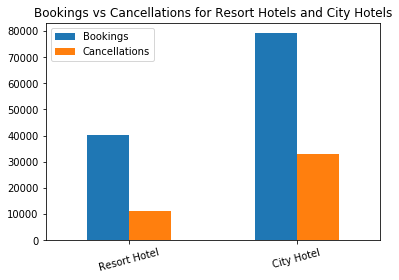

In [22]:
# A python dictionary
data = {"Bookings":[40047, 79163],

        "Cancellations":[11122, 33102]
       }

index     = ["Resort Hotel", "City Hotel"]

# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart

dataFrame.plot.bar(rot=15, title="Bookings vs Cancellations for Resort Hotels and City Hotels");

plt.show(block=True);

Now we will compare the ADR rates for both Resort and the City Hotels

In [23]:
# Creating a new dataframe for ADR for both the hotels

adr_df = df_1.iloc[:,[0,1,25]]
adr_df.head()

,Arrival_Date,hotel,adr
0,2015-07-01,Resort Hotel,0.0
1,2015-07-01,Resort Hotel,0.0
2,2015-07-01,Resort Hotel,75.0
3,2015-07-01,Resort Hotel,75.0
4,2015-07-01,Resort Hotel,98.0


In [24]:
# Setting the arrival time as the datetime index for ADR dataframe

idx = pd.to_datetime(adr_df['Arrival_Date'])
adr_df.set_index(idx, inplace = True)
adr_df.drop(['Arrival_Date'],inplace = True, axis = 1)
adr_df.head()

C:\Users\arun\anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,hotel,adr
Arrival_Date,,
2015-07-01,Resort Hotel,0.0
2015-07-01,Resort Hotel,0.0
2015-07-01,Resort Hotel,75.0
2015-07-01,Resort Hotel,75.0
2015-07-01,Resort Hotel,98.0


In [25]:
# Individually calculating the ADR for both Resort and City Hotels

Resort_hotel_df = adr_df[adr_df['hotel'] == "Resort Hotel"]
print(Resort_hotel_df.head())
City_hotel_df = adr_df[adr_df['hotel'] == "City Hotel"]
print("\n")
print(City_hotel_df.head())

                     hotel   adr
Arrival_Date                    
2015-07-01    Resort Hotel   0.0
2015-07-01    Resort Hotel   0.0
2015-07-01    Resort Hotel  75.0
2015-07-01    Resort Hotel  75.0
2015-07-01    Resort Hotel  98.0


                   hotel   adr
Arrival_Date                  
2015-07-01    City Hotel   0.0
2015-07-01    City Hotel  76.5
2015-07-01    City Hotel  68.0
2015-07-01    City Hotel  76.5
2015-07-02    City Hotel  76.5


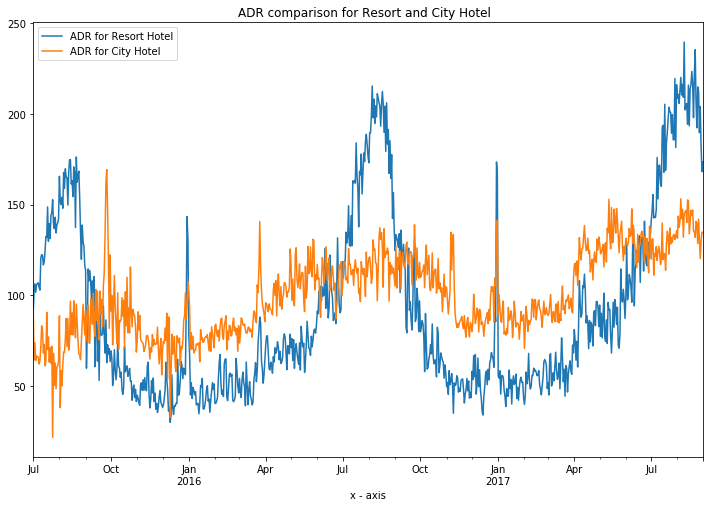

In [26]:
# Plotting the ADR for comparison

resort_hotel_series = Resort_hotel_df['adr']
city_hotel_series = City_hotel_df['adr']

resort_hotel_series.resample(rule = 'd').mean().plot(label = "ADR for Resort Hotel", figsize = (12,8))
city_hotel_series.resample(rule = 'd').mean().plot(label = "ADR for City Hotel",figsize = (12,8))
plt.xlabel('x - axis')
plt.title('ADR comparison for Resort and City Hotel  ')
plt.legend()
plt.show()

# Countrywise comparison

Now we will find out from which country maximum number of bookings are coming

In [33]:
df_country = df_1.iloc[:,[0,2,11]]
df_country.head()

,Arrival_Date,is_canceled,country
0,2015-07-01,0,PRT
1,2015-07-01,0,PRT
2,2015-07-01,0,GBR
3,2015-07-01,0,GBR
4,2015-07-01,0,GBR


In [37]:
df_not_canceled = df_country[df_country['is_canceled'] == 0]
df_not_canceled.head()

,Arrival_Date,is_canceled,country
0,2015-07-01,0,PRT
1,2015-07-01,0,PRT
2,2015-07-01,0,GBR
3,2015-07-01,0,GBR
4,2015-07-01,0,GBR


In [42]:
temp_df = pd.DataFrame(df_not_canceled['country'].value_counts())
temp_df.head()

,country
PRT,21071
GBR,9676
FRA,8481
ESP,6391
DEU,6069


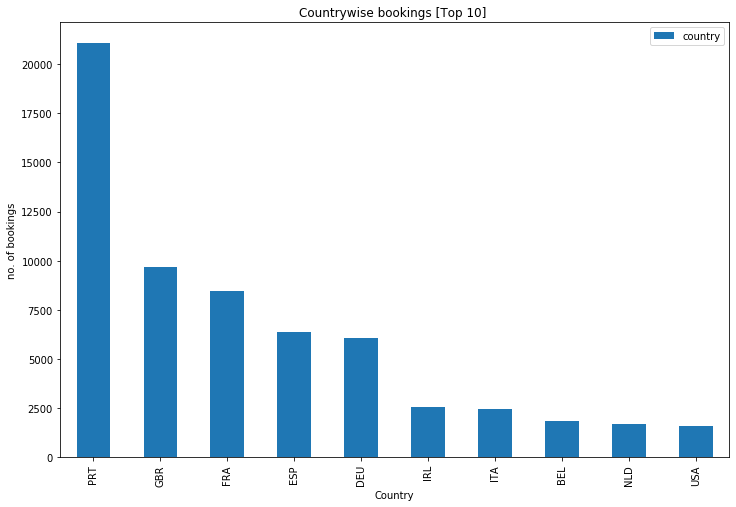

In [47]:
temp_df.head(10).plot(kind = 'bar',figsize = (12,8))
plt.ylabel("no. of bookings")
plt.xlabel('Country')
plt.title('Countrywise bookings [Top 10] ')
plt.show()

# Customer type

In [27]:
df_1['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

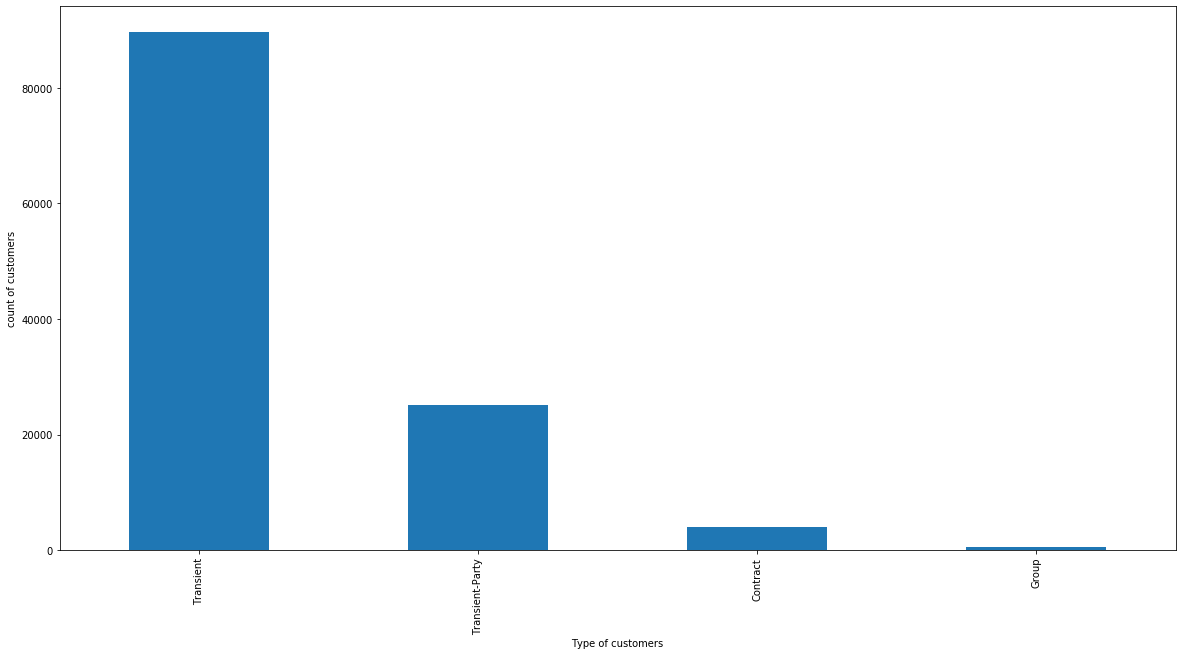

In [28]:
# Plotting the number of typer of customers
df_1['customer_type'].value_counts().plot(kind='bar', figsize=(20,10))
plt.xlabel('Type of customers')
plt.ylabel('count of customers')
plt.show()

# Market Segment

Now we will try to identify the market segment of the customers i.e if they have booked through TA(travel agent)
or TO(tourist operator)

In [29]:
booking_mode = df_1.iloc[:,[0,12,30]]
booking_mode.head()

,Arrival_Date,market_segment,Total_individuals
0,2015-07-01,Direct,2.0
1,2015-07-01,Direct,2.0
2,2015-07-01,Direct,1.0
3,2015-07-01,Corporate,1.0
4,2015-07-01,Online TA,2.0


In [30]:
print(booking_mode['market_segment'].unique())
print(booking_mode['market_segment'].isna().sum())

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
0


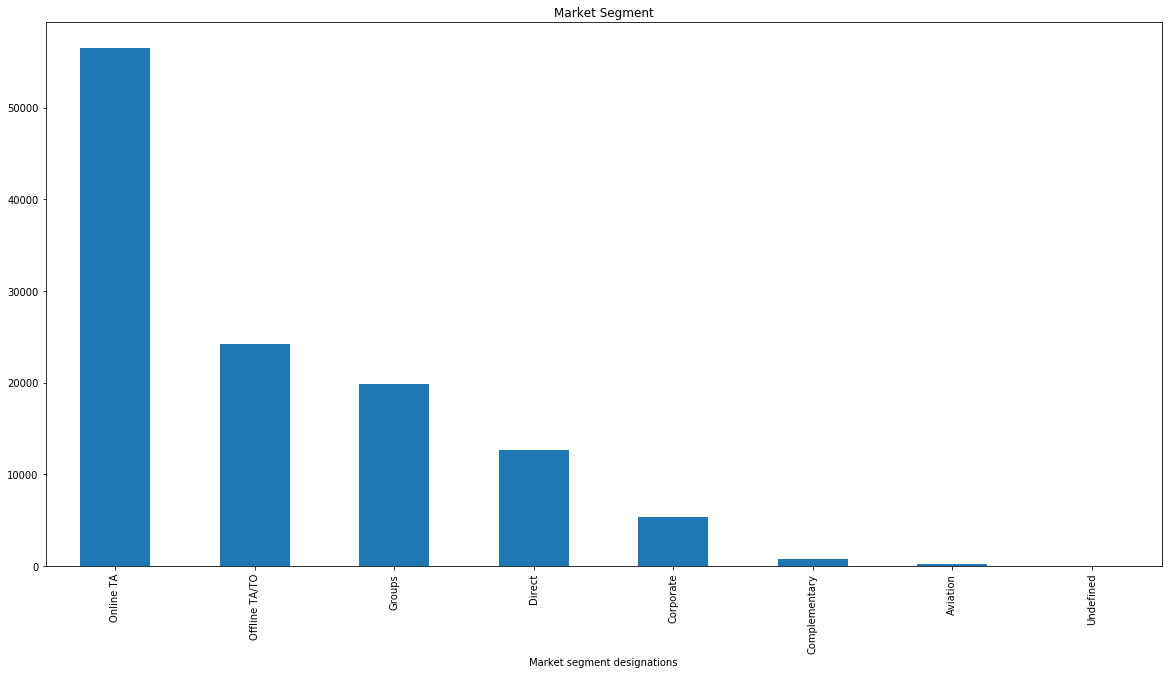

In [31]:
booking_mode['market_segment'].value_counts().plot(kind='bar', figsize=(20,10))
plt.xlabel('Market segment designations')
#plt.ylabel('count of customers')
plt.title('Market Segment')
plt.show()

# Distribution Channel

Now we will try to find out the distribution channel preffered by majority customers

In [32]:
print(df_1['distribution_channel'].unique())
print(df_1['distribution_channel'].isna().sum())

['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
0


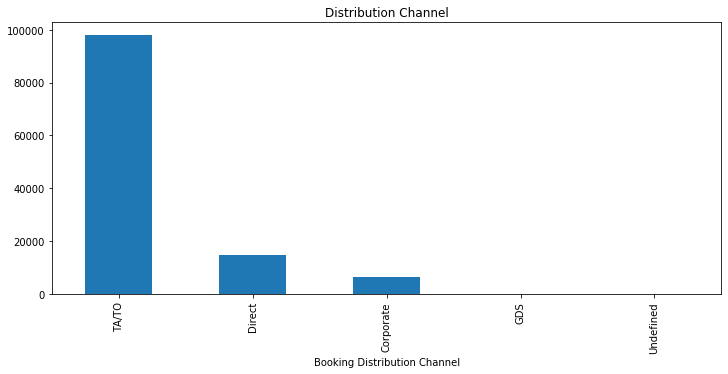

In [34]:
df_1['distribution_channel'].value_counts().plot(kind='bar', figsize=(12,5))
plt.xlabel('Booking Distribution Channel')
#plt.ylabel('count of customers')
plt.title('Distribution Channel')
plt.show()

Now, we will try to find out if there is a relation between "Deposit Type" by the customer and thier cancellation

In [35]:
# Creating a dataframe with cancelled and deposit type of the customers

deposit_type_df = df_1.iloc[:,[0,2,20]]
deposit_type_df.head()

,Arrival_Date,is_canceled,deposit_type
0,2015-07-01,0,No Deposit
1,2015-07-01,0,No Deposit
2,2015-07-01,0,No Deposit
3,2015-07-01,0,No Deposit
4,2015-07-01,0,No Deposit


In [36]:
# Seperating out the customers who have cancelled their bookings

temp = deposit_type_df[deposit_type_df['is_canceled'] == 1]
temp.head()

,Arrival_Date,is_canceled,deposit_type
8,2015-07-01,1,No Deposit
9,2015-07-01,1,No Deposit
10,2015-07-01,1,No Deposit
27,2015-07-01,1,No Deposit
32,2015-07-01,1,No Deposit


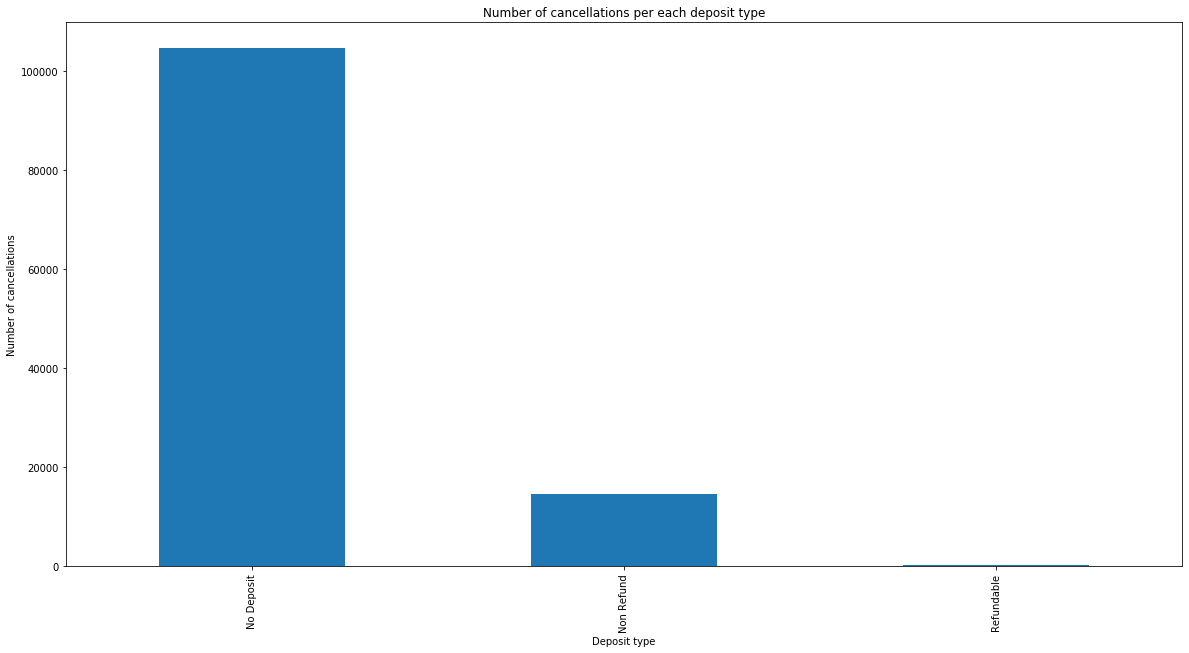

In [37]:
# Plotting the Bar plot

deposit_type_df['deposit_type'].value_counts().plot(kind = 'bar', figsize = (20,10))
plt.xlabel('Deposit type')
plt.ylabel('Number of cancellations')
plt.title('Number of cancellations per each deposit type')
plt.show()

From the above plot, we can see that the customers who don't deposit money while booking are most likely to cancel as
compared to those customers who deposit either some or the comeplete amount during booking.

# Room Type

Now, we are going to find out the most preffered room types by the customers

In [38]:
df_reserved_room_type = df_1.iloc[:,[1,17]]
df_reserved_room_type.head()

,hotel,reserved_room_type
0,Resort Hotel,C
1,Resort Hotel,C
2,Resort Hotel,A
3,Resort Hotel,A
4,Resort Hotel,A


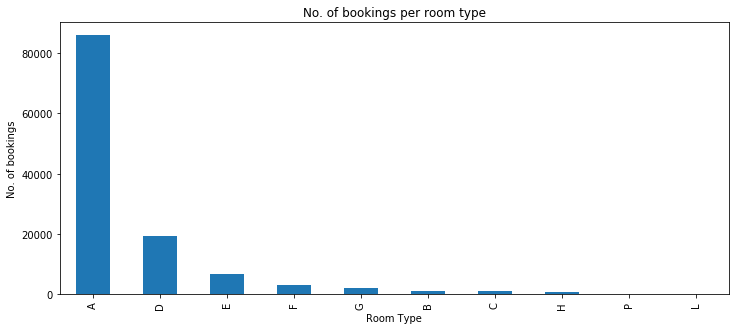

In [39]:
df_reserved_room_type['reserved_room_type'].value_counts().plot(kind = 'bar', figsize= (12,5))
plt.xlabel('Room Type')
plt.ylabel('No. of bookings')
plt.title('No. of bookings per room type')
plt.show()

From the above plot, we can see that room type A, D, E, F, G are the top five preferences of the rooms by the customers

# Distribution of Guests

Now, we will try to find out Distribution of Guests w.r.t various variables

In [40]:
df_distrb_of_guests = df_1.iloc[:,[1,2,5,6,7,8,9,30]]
df_distrb_of_guests.head()

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,Total_individuals
0,Resort Hotel,0,0,0,2,0.0,0,2.0
1,Resort Hotel,0,0,0,2,0.0,0,2.0
2,Resort Hotel,0,0,1,1,0.0,0,1.0
3,Resort Hotel,0,0,1,1,0.0,0,1.0
4,Resort Hotel,0,0,2,2,0.0,0,2.0


In [43]:
df_distrb_of_guests['total_days_of_stay'] = df_distrb_of_guests['stays_in_weekend_nights'] + df_distrb_of_guests['stays_in_week_nights']
df_distrb_of_guests.tail()

C:\Users\arun\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,Total_individuals,total_days_of_stay
119385,City Hotel,0,2,5,2,0.0,0,2.0,7
119386,City Hotel,0,2,5,3,0.0,0,3.0,7
119387,City Hotel,0,2,5,2,0.0,0,2.0,7
119388,City Hotel,0,2,5,2,0.0,0,2.0,7
119389,City Hotel,0,2,7,2,0.0,0,2.0,9


In [44]:
df_not_canceled = df_distrb_of_guests[df_distrb_of_guests['is_canceled'] != 0]
df_not_canceled.head()

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,Total_individuals,total_days_of_stay
8,Resort Hotel,1,0,3,2,0.0,0,2.0,3
9,Resort Hotel,1,0,3,2,0.0,0,2.0,3
10,Resort Hotel,1,0,4,2,0.0,0,2.0,4
27,Resort Hotel,1,2,5,2,0.0,0,2.0,7
32,Resort Hotel,1,2,8,2,0.0,0,2.0,10


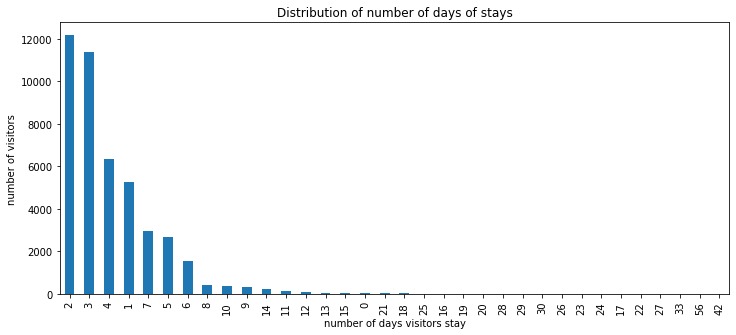

In [45]:
df_not_canceled['total_days_of_stay'].value_counts().plot(kind = 'bar', figsize = (12,5))
plt.xlabel('number of days visitors stay')
plt.ylabel('number of visitors')
plt.title('Distribution of number of days of stays')
plt.show()

Above plot shows the distribution of number of days of stay of various customers

Now, we will try to find out the distribution of Adults, Children, and Babies which come to the hotels

In [46]:
total_adults = df_not_canceled[df_not_canceled['adults'] != 0].count().sum()
total_children = df_not_canceled[df_not_canceled['children'] != 0].count().sum()
total_babies = df_not_canceled[df_not_canceled['babies'] != 0].count().sum()

print("The total number of adults is : {}".format(total_adults))
print("The total number of children is : {}".format(total_children))
print("The total number of babies is : {}".format(total_babies))

The total number of adults is : 397027
The total number of children is : 28162
The total number of babies is : 1503


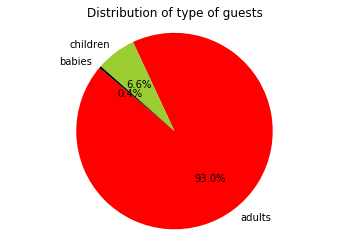

In [47]:
# Data to plot.
labels = 'adults', 'children', 'babies'
sizes = [total_adults, total_children, total_babies]
colors = ['red', 'yellowgreen', 'black']
explode = (0, 0, 1) # explode 3rd slice.
# Plot.
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140,radius = 1000000)

plt.axis('equal')
plt.title("Distribution of type of guests")
plt.show()

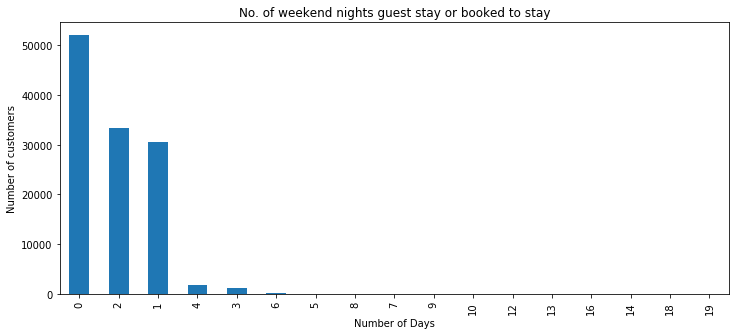

In [53]:
df_distrb_of_guests['stays_in_weekend_nights'].value_counts().plot(kind = 'bar', figsize = (12,5))
plt.xlabel('Number of Days')
plt.ylabel('Number of customers')
plt.title('No. of weekend nights guest stay or booked to stay')
plt.show()

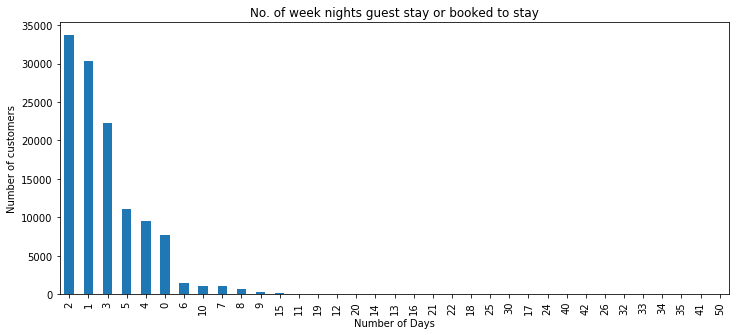

In [54]:
df_distrb_of_guests['stays_in_week_nights'].value_counts().plot(kind = 'bar', figsize = (12,5))
plt.xlabel('Number of Days')
plt.ylabel('Number of customers')
plt.title('No. of week nights guest stay or booked to stay')
plt.show()